In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2017.csv', dtype = {'fips': str})
climate_2017 = ur_files.compute()
climate_2017 = climate_2017.loc[:, ~climate_2017.columns.str.contains('^Unnamed')]
climate_2017.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,66.432964,9.246260,3.987535,0.196229,0.185596,0.520776,0.005540,0.0,0.135734,72.545991,66.185922,10.0,0.0,3,6.322882
1,01003,12.427907,68.920833,NaN,5.980278,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.4,1.0,4,5.643659
2,01005,94.311111,67.550137,9.003976,3.042740,0.165452,0.128767,0.383562,0.005479,0.0,0.186301,70.541451,67.320599,10.2,0.0,6,9.583501
3,01007,162.637500,65.090411,9.095616,3.364110,0.179808,0.126027,0.386301,0.010959,0.0,0.134247,73.727778,64.764658,9.7,0.0,2,5.819276
4,01009,243.931250,61.284658,NaN,3.994247,0.166959,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.8,0.0,2,6.826487


In [4]:
climate_2017 = climate_2017[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality', 'SuicideDeathRate']]

In [5]:
climate_2017 = climate_2017.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2017.iloc[:, 1:-1].values
y = climate_2017.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.1821673 , 0.05497654, 0.07293492, 0.05464327, 0.04360253,
       0.0453982 , 0.05423452, 0.04606486, 0.00457586, 0.04752757,
       0.05858906, 0.17335397, 0.0871378 , 0.0138066 , 0.060987  ])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2017.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

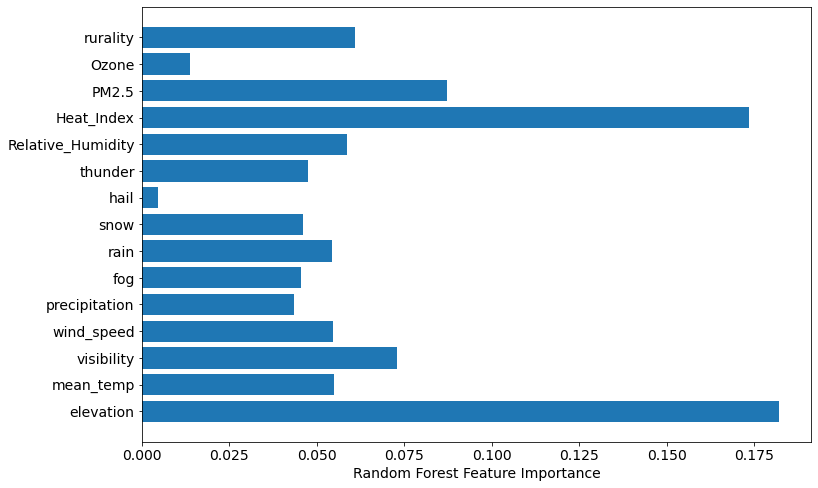

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 13,  4,  5,  7,  9,  6,  3,  1, 10, 14,  2, 12, 11,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00457586, 0.0138066 , 0.04360253, 0.0453982 , 0.04606486,
       0.04752757, 0.05423452, 0.05464327, 0.05497654, 0.05858906,
       0.060987  , 0.07293492, 0.0871378 , 0.17335397, 0.1821673 ])

Text(0.5, 0, 'Random Forest Feature Importance')

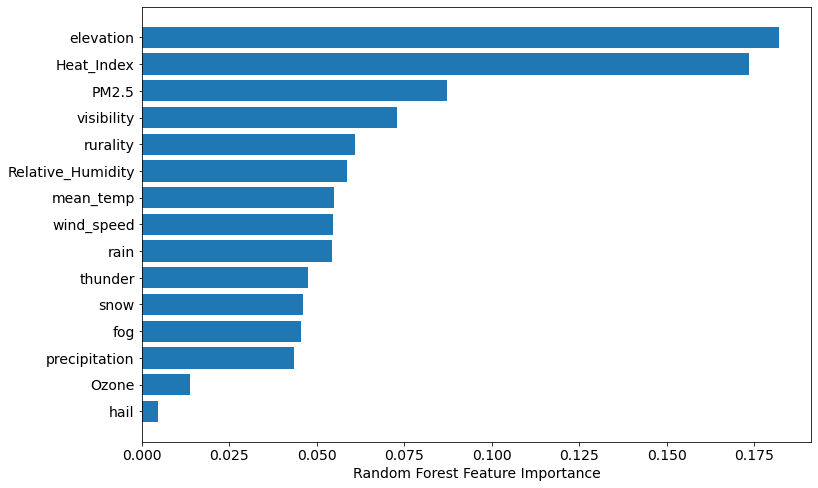

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

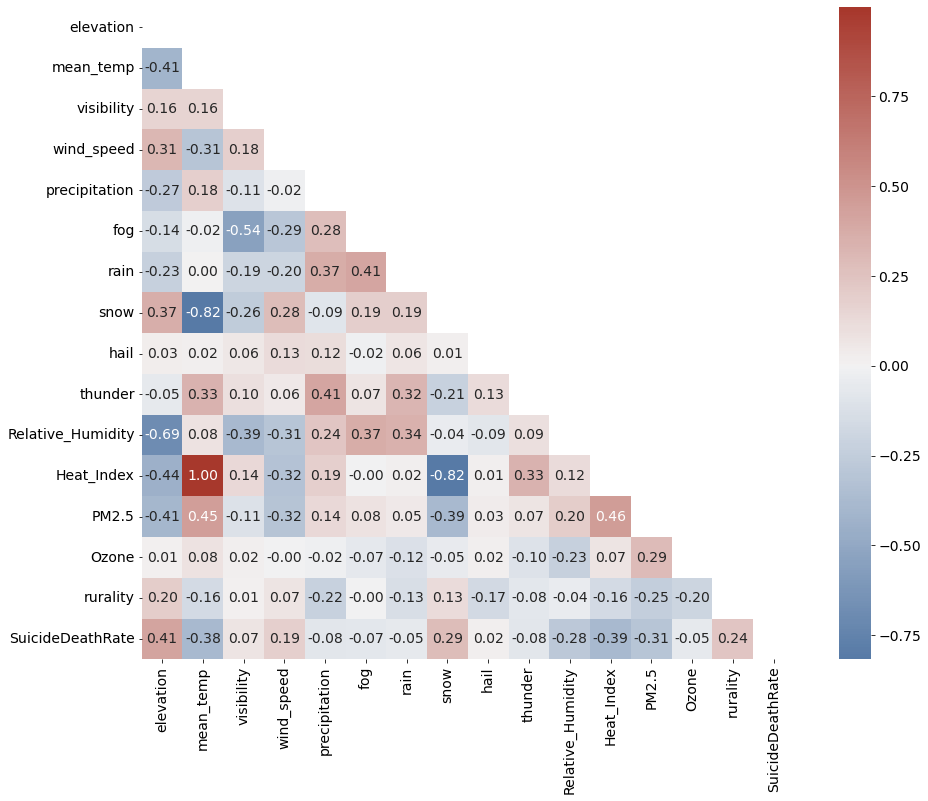

In [21]:
correlation_matrix(climate_2017)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2017.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2017 = ur_files.compute()
social_2017 = social_2017.loc[:, ~social_2017.columns.str.contains('^Unnamed')]
social_2017.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,40045,27272.0,0.171555,0.124121,0.141763,0.028923,0.225352,0.010462,0.005712,0.209410,0.045809,0.236714,0.130912,0.481632,0.012921,0.285273,"Ellis County, OK",7.146635
1,40051,27334.0,0.124159,0.119022,0.145647,0.033480,0.208998,0.021679,0.023391,0.151570,0.037375,0.244448,0.180015,0.617015,0.012640,0.219735,"Grady County, OK",7.146635
2,40119,22785.0,0.263145,0.089728,0.100425,0.056900,0.321887,0.033154,0.111002,0.116006,0.062704,0.193678,0.226592,0.529113,0.099003,0.218812,"Payne County, OK",7.611333
3,40125,22284.0,0.169700,0.135085,0.122731,0.052806,0.243826,0.024648,0.032731,0.155835,0.043118,0.243011,0.270296,0.647418,0.045424,0.256268,"Pottawatomie County, OK",7.602449
4,40037,24056.0,0.151820,0.137377,0.208241,0.036480,0.227509,0.035571,0.024049,0.167859,0.026556,0.242246,0.232415,0.494830,0.011721,0.262649,"Creek County, OK",8.200958


In [23]:
social_2017['SuicideDeathRate'].isna().sum()

161

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2017 = social_2017.dropna(how = 'any')

In [25]:
social_2017.shape

(3057, 18)

In [26]:
X = social_2017.iloc[:, 1:-2].values
y = social_2017.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.06161527, 0.05623095, 0.08293589, 0.06956884, 0.04299693,
       0.04933327, 0.07100856, 0.05299592, 0.07643923, 0.07816386,
       0.06604161, 0.11527443, 0.04715617, 0.04960174, 0.08063736])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2017.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2017.shape

(3057, 18)

In [32]:
climate_2017.shape

(2724, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

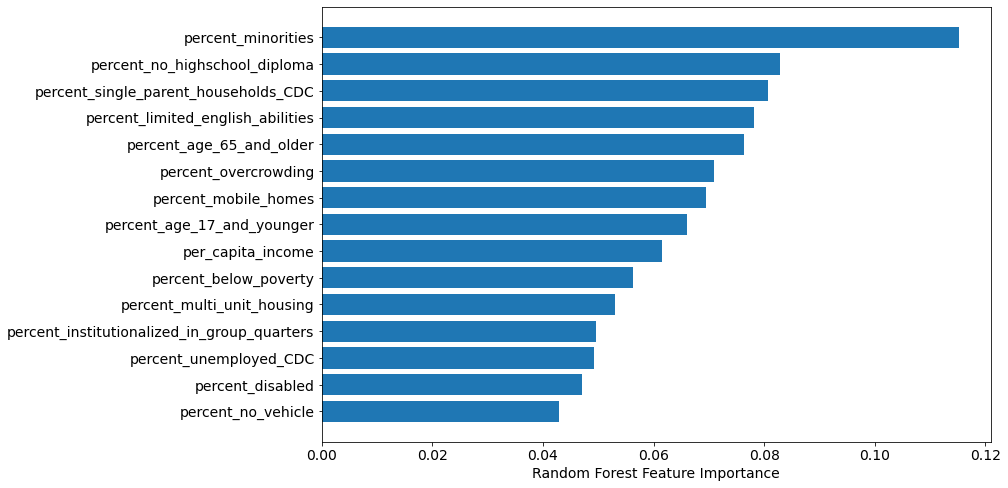

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

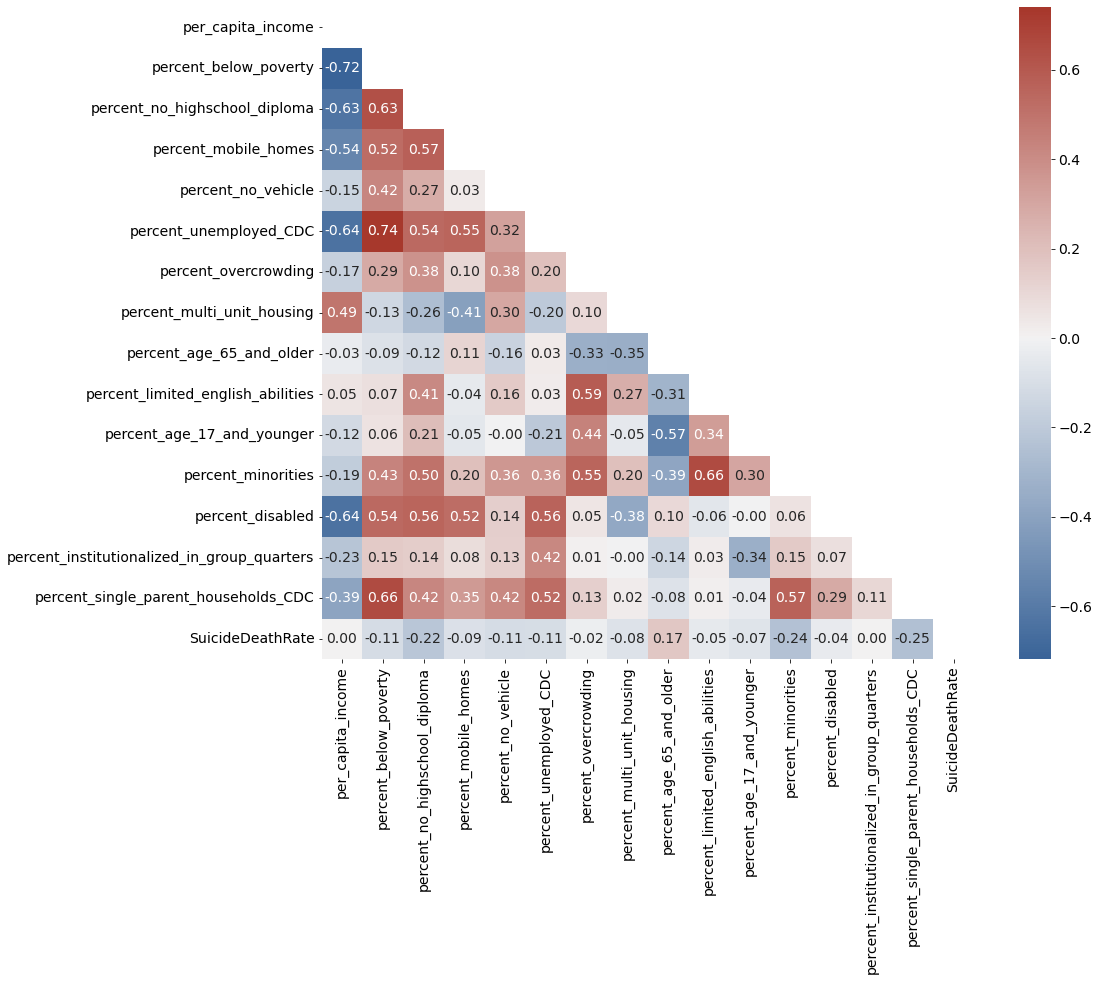

In [36]:
correlation_matrix(social_2017)

## find the rank of importances of all factors

In [37]:
df_total = social_2017.merge(climate_2017, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
0,40045,27272.0,0.171555,0.124121,0.141763,0.028923,0.225352,0.010462,0.005712,0.209410,...,0.057534,0.265753,0.024658,0.0,0.095890,54.332139,58.003474,6.7,0.0,6.0
1,40051,27334.0,0.124159,0.119022,0.145647,0.033480,0.208998,0.021679,0.023391,0.151570,...,0.022039,0.126722,0.013774,0.0,0.052342,64.750792,60.854196,8.4,1.0,2.0
3,40125,22284.0,0.169700,0.135085,0.122731,0.052806,0.243826,0.024648,0.032731,0.155835,...,0.049451,0.255495,0.019231,0.0,0.123626,63.572170,60.514980,8.8,0.0,5.0
4,40037,24056.0,0.151820,0.137377,0.208241,0.036480,0.227509,0.035571,0.024049,0.167859,...,0.043836,0.284932,0.016438,0.0,0.136986,58.682778,63.261022,10.0,0.0,3.0
5,40141,21422.0,0.221086,0.249565,0.042624,0.060093,0.229356,0.040837,0.013951,0.191543,...,0.071429,0.241758,0.016484,0.0,0.104396,58.634152,62.970036,7.6,0.0,6.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2723, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,40045,"Ellis County, OK",0.171555,27272.0,0.225352,0.124121,0.209410,0.236714,0.481632,0.285273,...,58.003474,0.057534,0.265753,0.024658,0.0,0.095890,6.7,0.0,6.0,7.146635
1,40051,"Grady County, OK",0.124159,27334.0,0.208998,0.119022,0.151570,0.244448,0.617015,0.219735,...,60.854196,0.022039,0.126722,0.013774,0.0,0.052342,8.4,1.0,2.0,7.146635
3,40125,"Pottawatomie County, OK",0.169700,22284.0,0.243826,0.135085,0.155835,0.243011,0.647418,0.256268,...,60.514980,0.049451,0.255495,0.019231,0.0,0.123626,8.8,0.0,5.0,7.602449
4,40037,"Creek County, OK",0.151820,24056.0,0.227509,0.137377,0.167859,0.242246,0.494830,0.262649,...,63.261022,0.043836,0.284932,0.016438,0.0,0.136986,10.0,0.0,3.0,8.200958
5,40141,"Tillman County, OK",0.221086,21422.0,0.229356,0.249565,0.191543,0.241734,0.548624,0.304090,...,62.970036,0.071429,0.241758,0.016484,0.0,0.104396,7.6,0.0,6.0,12.878788


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.02095104, 0.02227143, 0.01697521, 0.02376299, 0.02594595,
       0.01760237, 0.02388125, 0.03748867, 0.04169601, 0.0233976 ,
       0.01788265, 0.02589012, 0.02020353, 0.01933446, 0.02217911,
       0.21665174, 0.03528512, 0.03815319, 0.02625945, 0.02151436,
       0.03102723, 0.08393406, 0.0246349 , 0.02813693, 0.0211639 ,
       0.00347694, 0.0252    , 0.04158518, 0.00549254, 0.03802206])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

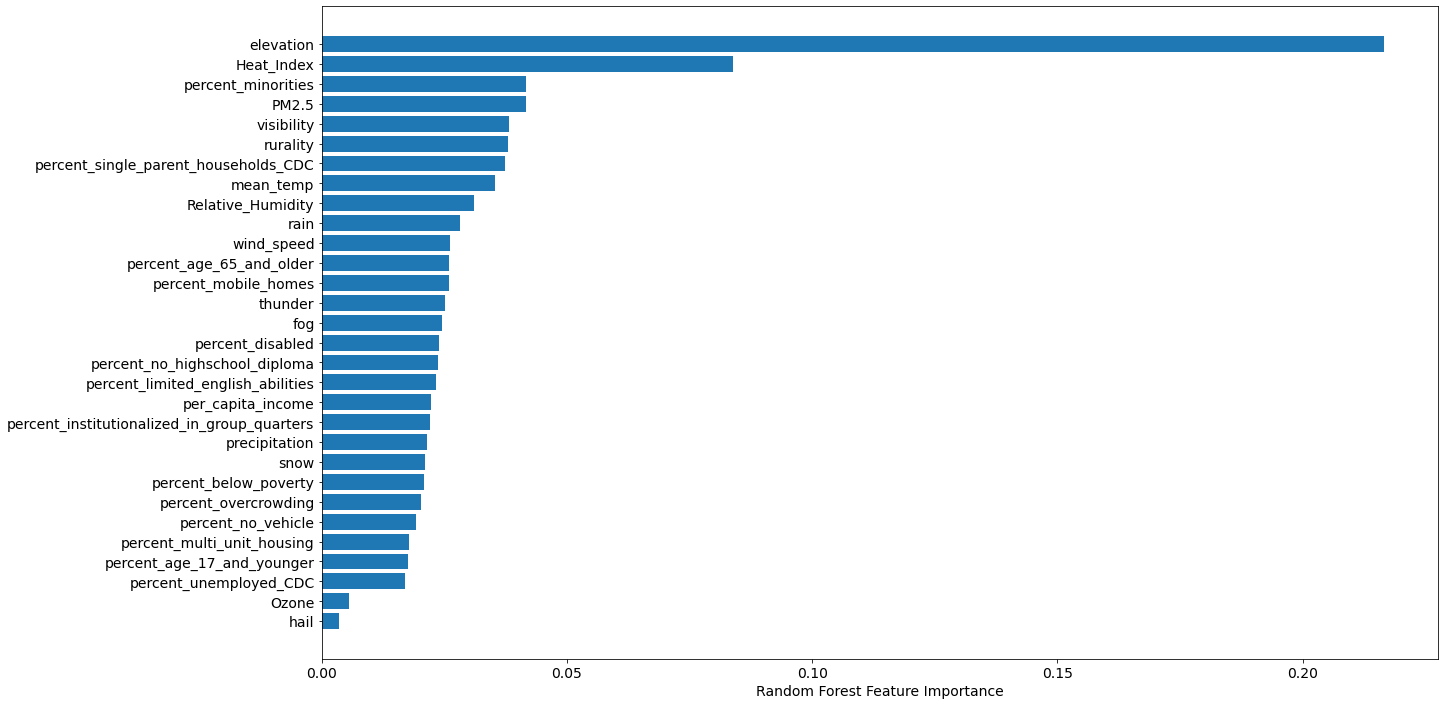

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2017.iloc[:, 1:-1]
y = climate_2017.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


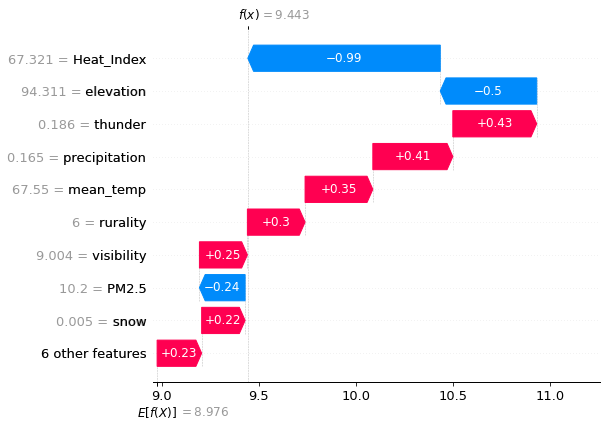

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

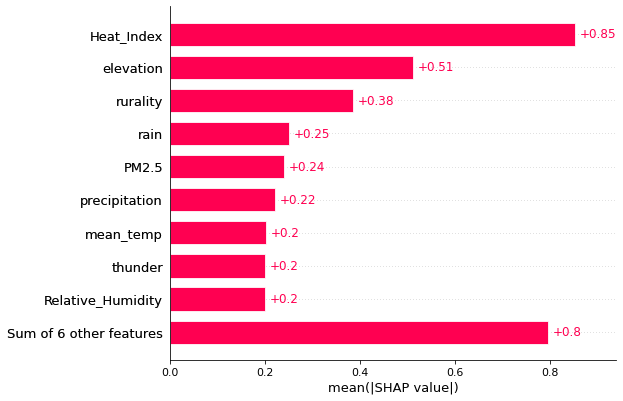

In [56]:
shap.plots.bar(shap_values)

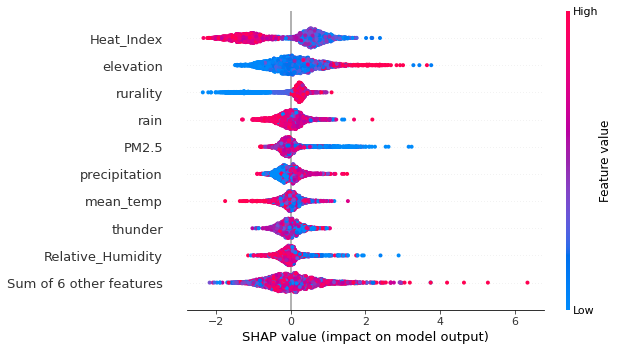

In [57]:
shap.plots.beeswarm(shap_values)

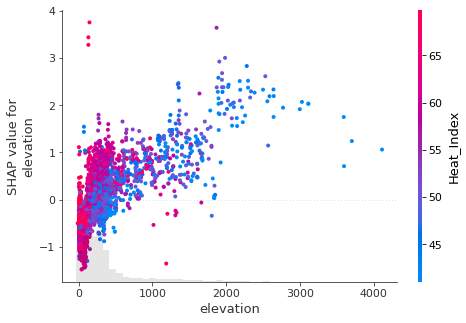

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

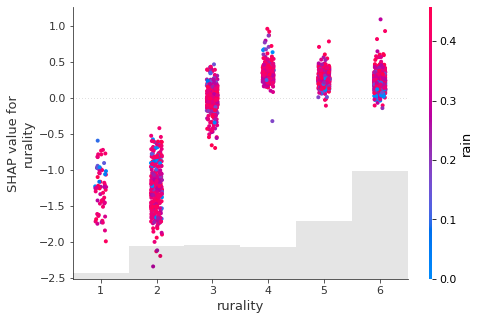

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

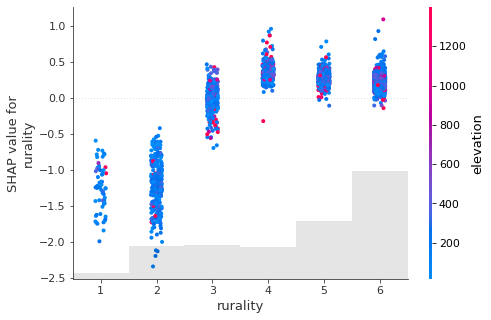

In [60]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

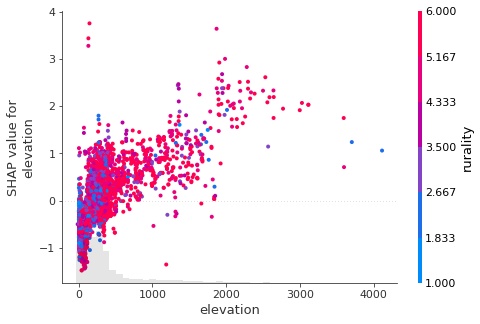

In [61]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

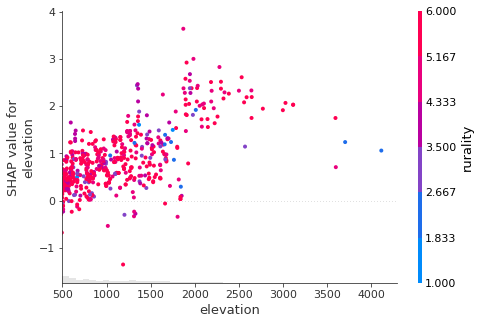

In [64]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

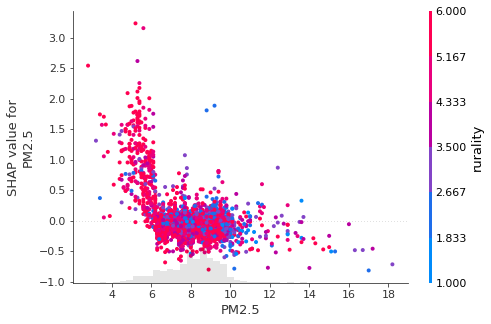

In [65]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

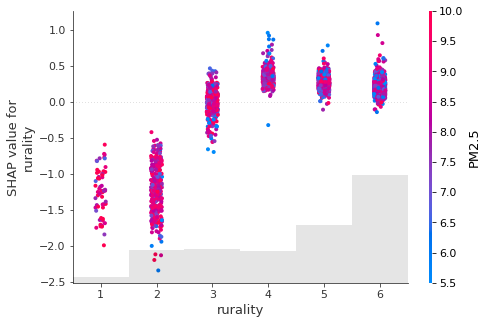

In [66]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

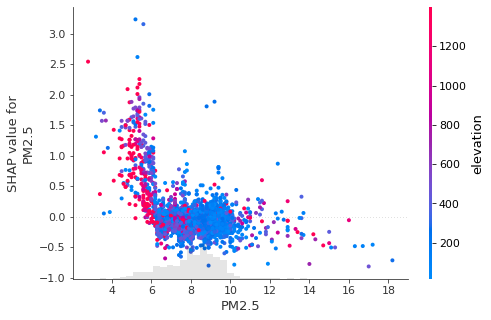

In [67]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

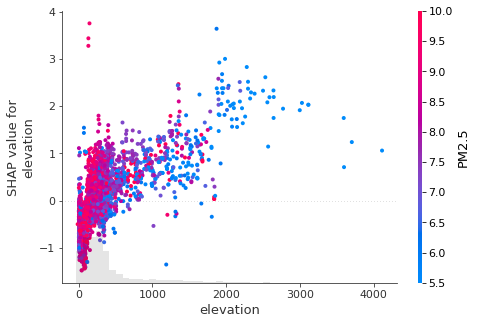

In [68]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### Social economic factors

In [69]:
social_2017.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,40045,27272.0,0.171555,0.124121,0.141763,0.028923,0.225352,0.010462,0.005712,0.209410,0.045809,0.236714,0.130912,0.481632,0.012921,0.285273,"Ellis County, OK",7.146635
1,40051,27334.0,0.124159,0.119022,0.145647,0.033480,0.208998,0.021679,0.023391,0.151570,0.037375,0.244448,0.180015,0.617015,0.012640,0.219735,"Grady County, OK",7.146635
2,40119,22785.0,0.263145,0.089728,0.100425,0.056900,0.321887,0.033154,0.111002,0.116006,0.062704,0.193678,0.226592,0.529113,0.099003,0.218812,"Payne County, OK",7.611333
3,40125,22284.0,0.169700,0.135085,0.122731,0.052806,0.243826,0.024648,0.032731,0.155835,0.043118,0.243011,0.270296,0.647418,0.045424,0.256268,"Pottawatomie County, OK",7.602449
4,40037,24056.0,0.151820,0.137377,0.208241,0.036480,0.227509,0.035571,0.024049,0.167859,0.026556,0.242246,0.232415,0.494830,0.011721,0.262649,"Creek County, OK",8.200958


In [70]:
X = social_2017.iloc[:, 1:-2]
y = social_2017.iloc[:, -1].array

In [71]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


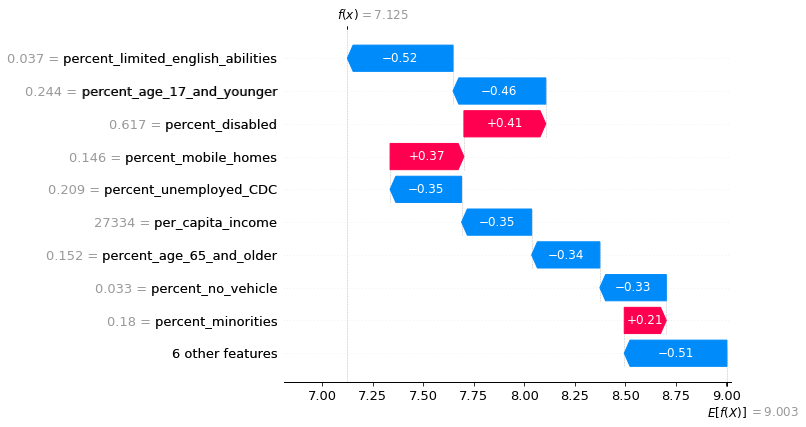

In [72]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

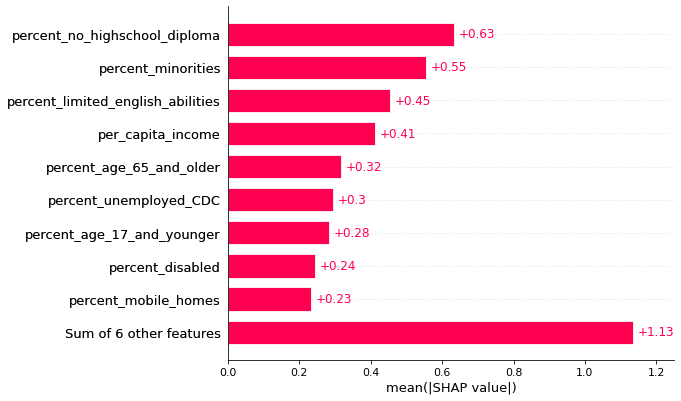

In [73]:
shap.plots.bar(shap_values)

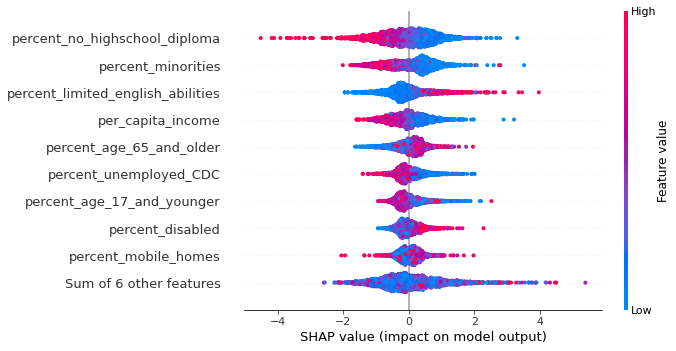

In [74]:
shap.plots.beeswarm(shap_values)

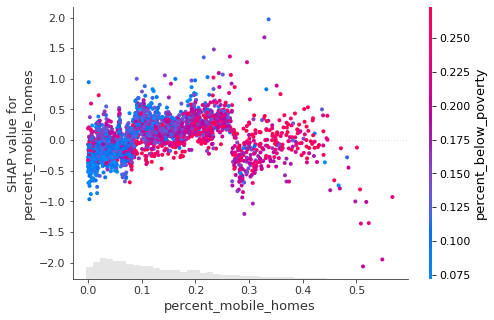

In [75]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)